In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
MILS_TO_SECS = 1e-3

In [3]:
col_names = "instance,model,size,val,time_ms,solver,status".split(",")
models = "cb,cs".split(",")
solvers = "cbc,cplex,gurobi,scip".upper().split(",")

In [4]:
df = pd.read_csv("./results/cs_cb_1_31_GUROBI_CPLEX_SCIP_CBC_chrobak", names=col_names)

## Verificar se o status de todos os outputs foram 0

O status == 0 se todos as execuções rodaram sem erros.

In [5]:
all(df.status == 0)

True

## Remover colunas não usadas à seguir

In [6]:
df.drop(labels=["instance", "val", "status"], axis="columns", inplace=True)

## Recuperar media dos tempos de execução

Trabalharemos à seguir com a media do tempo

In [7]:
df = df.groupby(by=["model", "size", "solver"]).time_ms.mean().reset_index()

## Converter o tempo de milesegundos para segundos

Para melhor visualisarmos o resultado do tempo de execução, o tempo será apresentado em 
segundos

In [8]:
df["time"] = df["time_ms"] * MILS_TO_SECS

In [9]:
df.drop("time_ms", axis="columns", inplace=True)

## Medir tempo por solver

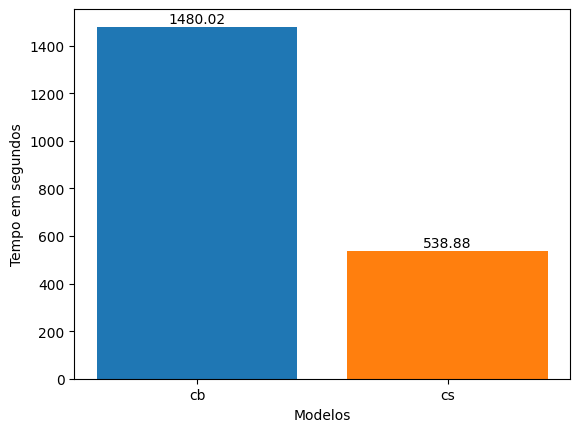

In [10]:
fig, ax = plt.subplots()
values = df.groupby(by="model").time.sum()

for xtick, model_time in enumerate(values[models]):
    ax.bar(xtick, model_time)
    ax.text(xtick, model_time + values.max() / 100, f"{model_time:.2f}", ha="center")

ax.set_xticks(np.arange(2))
ax.set_xticklabels(models)

plt.ylim(top=values.max() * 1.05)
plt.ylabel("Tempo em segundos")
plt.xlabel("Modelos")

plt.show()

In [11]:
models_time_sum = df.groupby("model")["time"].sum()

In [12]:
models_time_sum

model
cb    1480.019645
cs     538.880258
Name: time, dtype: float64

In [13]:
(models_time_sum["cs"] - models_time_sum["cb"]) / models_time_sum["cb"]

-0.6358965505449153

Vemos que o modelo common substring foi 35% mais rápido que o modelo common substring.

## Tempo por solver com ambos modelos

Nessa seção comparamos o tempo medio que cada solver levou para encontrar a solução ideal,
independente do modelo. 

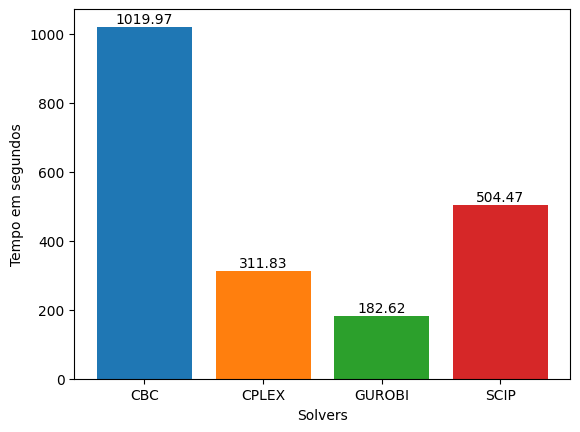

In [14]:
fig, ax = plt.subplots()
values = df.groupby("solver").time.sum()

for xtick, time_s in enumerate(values[solvers]):
    ax.bar(x=xtick, height=time_s)
    ax.text(x=xtick, y=time_s + values.max() / 100, s=f"{time_s:.2f}", ha="center")

ax.set_xticks(np.arange(4))
ax.set_xticklabels(solvers)

plt.ylim(top=values.max() * 1.05)
plt.xlabel("Solvers")
plt.ylabel("Tempo em segundos")

plt.show()

## Tempo por solver modelo common blocks

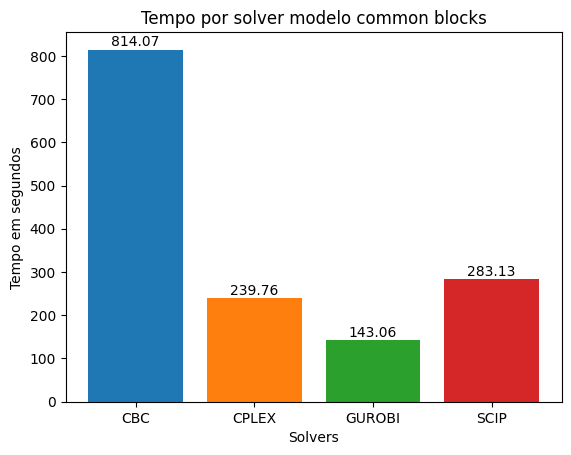

In [15]:
fig, ax = plt.subplots()
values = df.query("model=='cb'").groupby("solver").time.sum()

for xtick, time_s in enumerate(values[solvers]):
    ax.bar(x=xtick, height=time_s)
    ax.text(x=xtick, y=time_s + values.max() / 100, s=f"{time_s:.2f}", ha="center")

ax.set_xticks(np.arange(4))
ax.set_xticklabels(solvers)

plt.title("Tempo por solver modelo common blocks")
plt.ylim(top=values.max() * 1.05)
plt.xlabel("Solvers")
plt.ylabel("Tempo em segundos")

plt.show()

## Tempo por solver modelo common substring

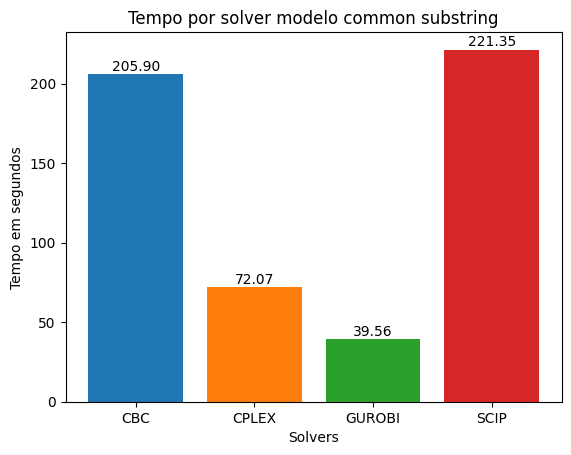

In [16]:
fig, ax = plt.subplots()
values = df.query("model=='cs'").groupby("solver").time.sum()

for xtick, time_s in enumerate(values[solvers]):
    ax.bar(x=xtick, height=time_s)
    ax.text(x=xtick, y=time_s + values.max() / 100, s=f"{time_s:.2f}", ha="center")

ax.set_xticks(np.arange(4))
ax.set_xticklabels(solvers)

plt.title("Tempo por solver modelo common substring")
plt.ylim(top=values.max() * 1.05)
plt.xlabel("Solvers")
plt.ylabel("Tempo em segundos")

plt.show()